In [41]:
pip install -U imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.0 kB 245.8 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.0 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 931.3 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


Importing libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

Loading data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

Identifying missing values

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Preview data

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Univarient Analysis

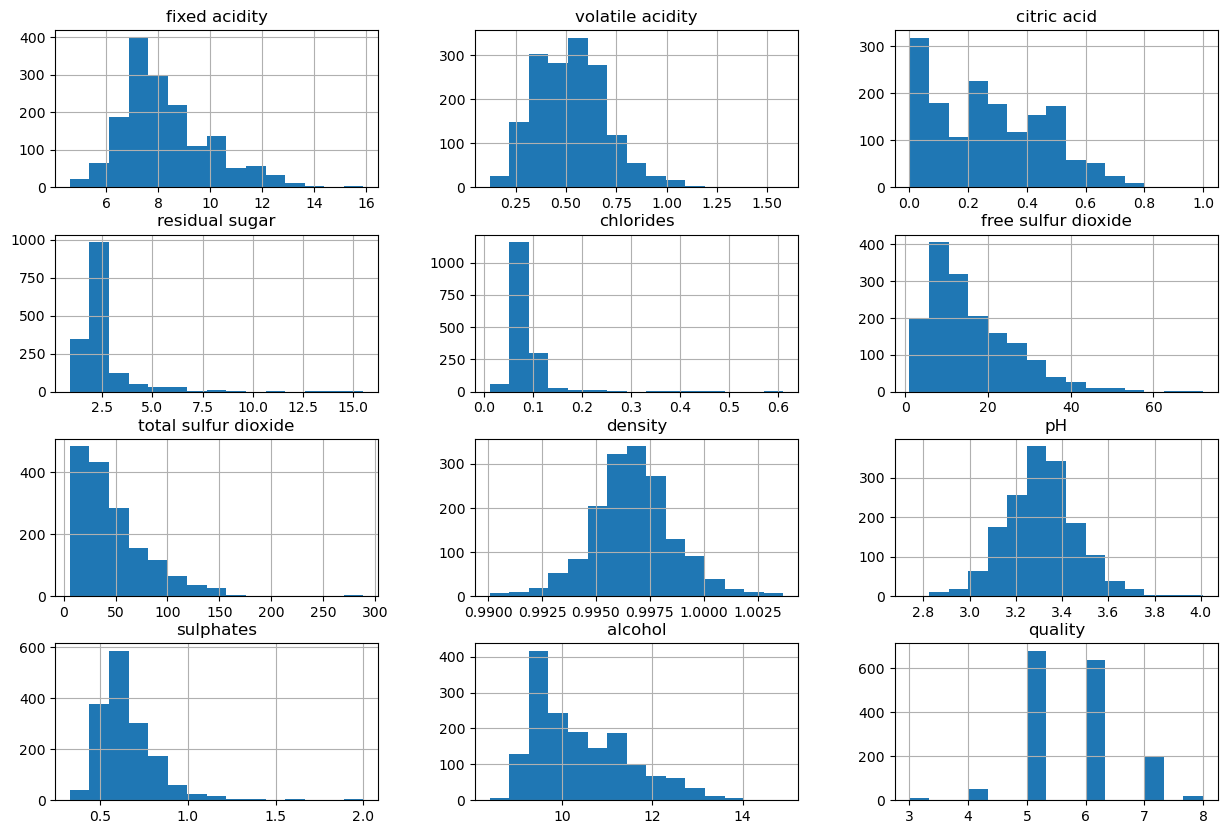

In [8]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

Bivarient Analysis

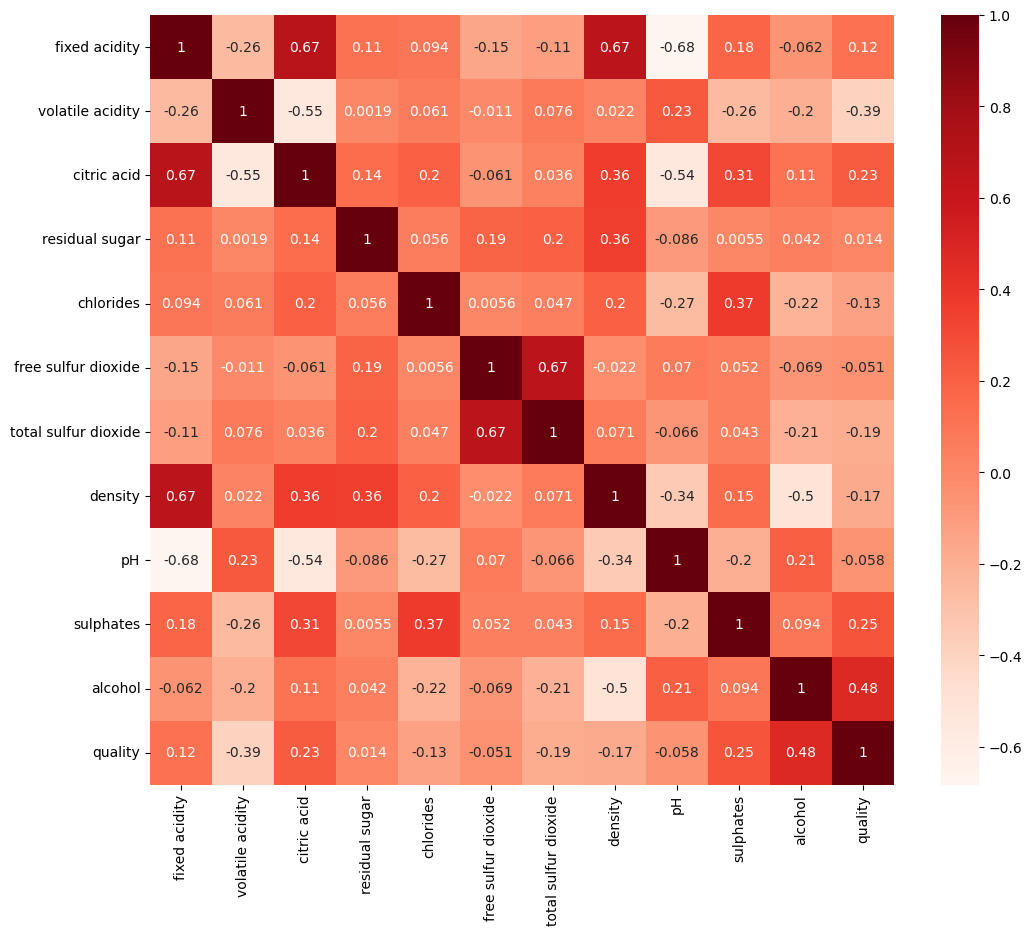

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Outlier detection

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [11]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

Separate features and target variabe

In [12]:
X = data.drop(['quality'], axis=1)
y = data['quality']

Plot for unbalanced dataset

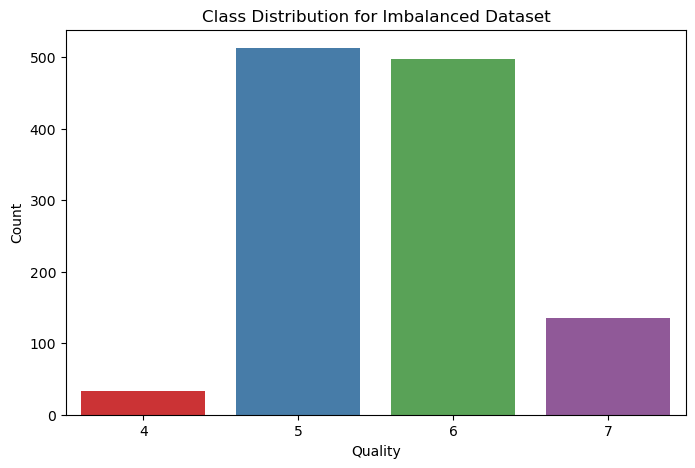

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='Set1')
plt.title('Class Distribution for Imbalanced Dataset')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Oversample the minority class to balance the dataset

In [14]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

Plot for balanced dataset

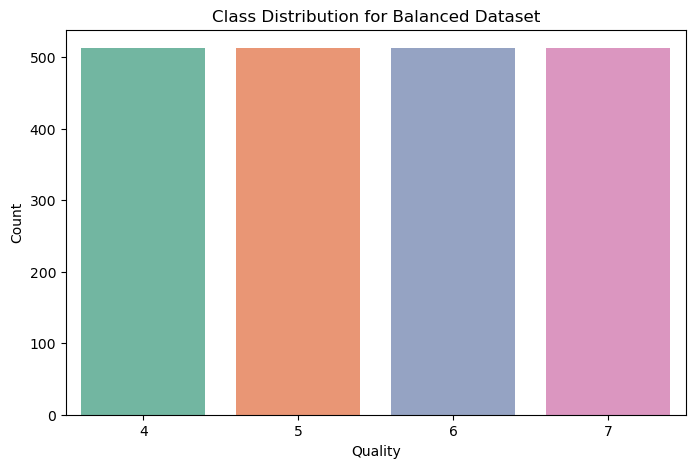

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Class Distribution for Balanced Dataset')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Visualisation

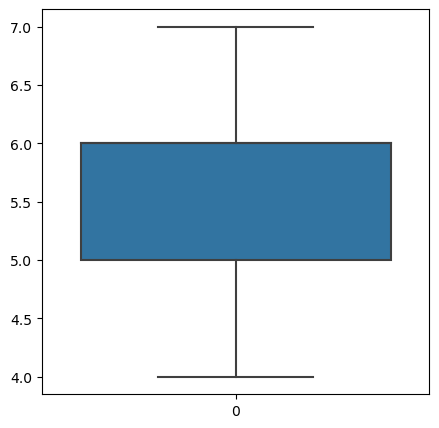

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(data['quality'])
plt.show()

Data Transformation

In [17]:
data['high_quality'] = [1 if x >= 7 else 0 for x in data['quality']]

Data Pre-processing

In [18]:
X = data.drop(['quality', 'high_quality'], axis=1)
y = data['high_quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyperparameter Tuning

In [21]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced']
}

In [22]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [23]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [25]:
grid_search.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

Training SVM

In [27]:
best_svm = grid_search.best_estimator_

In [28]:
best_svm.fit(X_train_scaled, y_train)

SVC(C=10, class_weight='balanced', gamma='auto')

In [29]:
accuracy = best_svm.score(X_test_scaled, y_test)

In [30]:
accuracy

0.9110169491525424

Confusion matrix

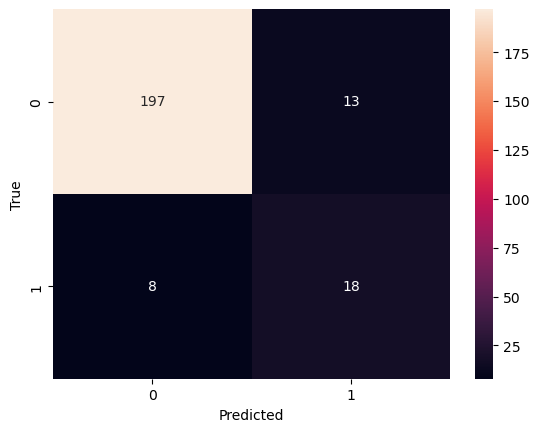

In [31]:
y_pred = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Feature importance

In [37]:
perm_importance = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)

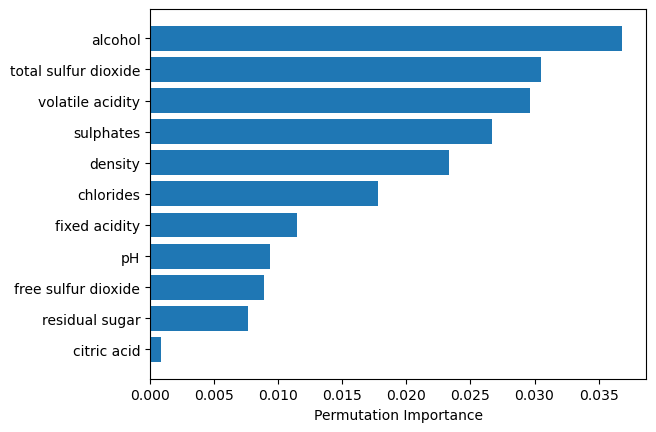

In [38]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()